# Price Elasticity


### Read the data

In [8]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
import math
from sklearn.linear_model import LinearRegression
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
AllSKU = pd.read_csv("C:/Users/amin.oskouei/Desktop/PE-all-SKU/All-200-SKU.csv")
# Preview the first 5 lines of the loaded data 
AllSKU.head()

,sku,full_date,total_qty,avg_list_price,avg_discount_rate,avg_paid_price
0,200SHG1-53076O,2018-05-07,1.0,179.00,0.5,89.00
1,200SPRE40B-76096,2018-05-07,1.0,489.00,0.5,244.00
2,200NCCL01-960136,2018-05-07,1.0,819.00,0.5,409.00
3,200JAPD1A-860116,2018-05-07,9.0,79.00,0.0,79.00
4,200XMP22684-508,2018-05-07,1.0,49.99,0.2,39.99


In [9]:
SKUID = pd.read_csv("C:/Users/amin.oskouei/Desktop/Top 10 SKU PE/PriceQunt/Top10SKU-ID.csv")
SKUID.head()


,sku,code
0,200RZBD16A-71001010,1
1,200RZBD16A-6709,2
2,200RZBD16A-53079,3
3,200RZBD16A-2808,4
4,200RZBD16A-406,5


In [11]:
sales = AllSKU.loc[(AllSKU['total_qty'] > 1)]
sales.head()

,sku,full_date,total_qty,avg_list_price,avg_discount_rate,avg_paid_price
3,200JAPD1A-860116,2018-05-07,9.0,79.0,0.00,79.0
6,200BDSM04A-203,2018-05-07,2.0,39.0,0.41,23.0
17,200HMCO4C-9012,2018-05-07,2.0,349.0,0.40,209.0
25,200ON01A-8010,2018-05-07,5.0,469.0,0.46,252.8
30,200TAJT09E-2608,2018-05-07,2.0,99.0,0.40,59.5


In [12]:
# Python program explaining 
# log() function 
import numpy as np 

logqty = np.log(sales['total_qty'])
logprice = np.log(sales['avg_paid_price'])
sales['logqty'] = logqty
sales['logprice'] = logprice
sales.head()

C:\Users\amin.oskouei\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\amin.oskouei\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,sku,full_date,total_qty,avg_list_price,avg_discount_rate,avg_paid_price,logqty,logprice
3,200JAPD1A-860116,2018-05-07,9.0,79.0,0.00,79.0,2.197225,4.369448
6,200BDSM04A-203,2018-05-07,2.0,39.0,0.41,23.0,0.693147,3.135494
17,200HMCO4C-9012,2018-05-07,2.0,349.0,0.40,209.0,0.693147,5.342334
25,200ON01A-8010,2018-05-07,5.0,469.0,0.46,252.8,1.609438,5.532599
30,200TAJT09E-2608,2018-05-07,2.0,99.0,0.40,59.5,0.693147,4.085976


### Extracting subset and do regression :


#### How merge data-set in Panda: https://chrisalbon.com/python/data_wrangling/pandas_join_merge_dataframe/

In [14]:
sales_inner = pd.merge(sales, SKUID, on='sku', how='left')
sales_inner.head()

,sku,full_date,total_qty,avg_list_price,avg_discount_rate,avg_paid_price,logqty,logprice,code
0,200JAPD1A-860116,2018-05-07,9.0,79.0,0.00,79.0,2.197225,4.369448,NaN
1,200BDSM04A-203,2018-05-07,2.0,39.0,0.41,23.0,0.693147,3.135494,100.0
2,200HMCO4C-9012,2018-05-07,2.0,349.0,0.40,209.0,0.693147,5.342334,NaN
3,200ON01A-8010,2018-05-07,5.0,469.0,0.46,252.8,1.609438,5.532599,NaN
4,200TAJT09E-2608,2018-05-07,2.0,99.0,0.40,59.5,0.693147,4.085976,NaN


### ln - ln simple regression

In [15]:
from sklearn import linear_model
for i in range (1,128):
        
        subset_data = sales_inner.loc[(sales_inner['code'] == i)]
        
        reg = linear_model.LinearRegression()
        reg.fit(subset_data[['logprice']], subset_data['logqty'])
        print(SKUID.loc[(SKUID['code'] == i),"sku"], reg.coef_)

for i in range (129,137):
        
        subset_data = sales_inner.loc[(sales_inner['code'] == i)]
        reg = linear_model.LinearRegression()
        reg.fit(subset_data[['logprice']], subset_data['logqty'])
        print(SKUID.loc[(SKUID['code'] == i),"sku"], reg.coef_)
        




0    200RZBD16A-71001010
Name: sku, dtype: object [-4.75925075]
1    200RZBD16A-6709
Name: sku, dtype: object [-4.14038199]
2    200RZBD16A-53079
Name: sku, dtype: object [-3.35211129]
3    200RZBD16A-2808
Name: sku, dtype: object [-1.43679542]
4    200RZBD16A-406
Name: sku, dtype: object [-1.78414537]
5    200RZBD16A-9012
Name: sku, dtype: object [-2.17506446]
6    200RZBD16A-203
Name: sku, dtype: object [-1.57488585]
7    200RZBD16A-305
Name: sku, dtype: object [-1.11826464]
8    200RZBD16A-28012
Name: sku, dtype: object [-0.8739697]
9    200RZBD16A-10014
Name: sku, dtype: object [-1.10448704]
10    200RZBD16A-505R
Name: sku, dtype: object [-0.86289031]
11    200RZBD16A-808S
Name: sku, dtype: object [-0.57252522]
12    200RZBD16A-12015
Name: sku, dtype: object [-0.68845394]
13    200RZBD16A-7100710R
Name: sku, dtype: object [-0.4752408]
14    200RZBD16A-28020
Name: sku, dtype: object [-0.13572497]
15    200RZBD16A-6709O
Name: sku, dtype: object [0.02659241]
16    200RZBD07A-71001010


### Plot Revenue for "RZBDA16A-71001010"

In [16]:
import matplotlib.pyplot as plt
subset_data = sales_inner.loc[(sales_inner['code'] == 1)]
Revenue = sales_inner
Revenue['revenue'] = Revenue['avg_paid_price'] * Revenue['total_qty']
subset_data = Revenue.loc[(Revenue['code'] == 1)]
subset_data.head()

,sku,full_date,total_qty,avg_list_price,avg_discount_rate,avg_paid_price,logqty,logprice,code,revenue
75,200RZBD16A-71001010,2018-05-07,9.0,329.0,0.49,167.67,2.197225,5.121998,1.0,1509.03
172,200RZBD16A-71001010,2018-05-08,5.0,329.0,0.48,170.60,1.609438,5.139322,1.0,853.00
413,200RZBD16A-71001010,2018-05-09,10.0,329.0,0.50,165.90,2.302585,5.111385,1.0,1659.00
521,200RZBD16A-71001010,2018-05-10,14.0,329.0,0.48,172.50,2.639057,5.150397,1.0,2415.00
696,200RZBD16A-71001010,2018-05-11,11.0,329.0,0.48,170.18,2.397895,5.136857,1.0,1871.98


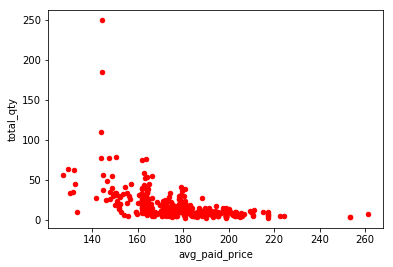

In [17]:
subset_data.plot(kind='scatter',x='avg_paid_price',y='total_qty',color='red')
plt.show()

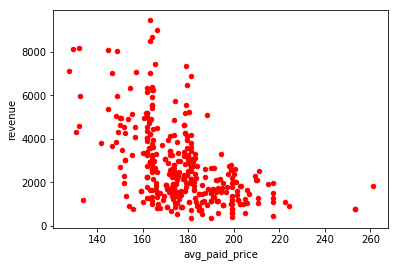

In [21]:
subset_data.plot(kind='scatter',x='avg_paid_price',y='revenue',color='red')
plt.show()

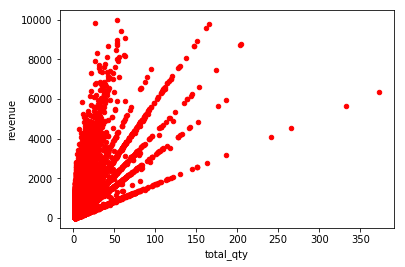

In [23]:
subset_data = sales_inner.loc[(sales_inner['revenue'] <10000)]
subset_data.plot(kind='scatter',x='total_qty',y='revenue',color='red')
plt.show()

### Revenue between 6K and 10K and total quantity < 45

In [20]:
subset_data = Revenue.loc[(Revenue['code'] == 1)]
subset_data = subset_data.loc[(sales_inner['revenue'] <10000)]
subset_data2 = subset_data.loc[(sales_inner['revenue'] >6000)]
subset_data3 = subset_data2.loc[(sales_inner['total_qty'] <45)]
subset_data3

,sku,full_date,total_qty,avg_list_price,avg_discount_rate,avg_paid_price,logqty,logprice,code,revenue
18253,200RZBD16A-71001010,2018-07-22,39.0,329.0,0.50,164.00,3.663562,5.099866,1.0,6396.00
23481,200RZBD16A-71001010,2018-08-12,38.0,329.0,0.50,164.45,3.637586,5.102607,1.0,6249.10
50012,200RZBD16A-71001010,2018-11-19,41.0,362.0,0.57,154.37,3.713572,5.039352,1.0,6329.17
69620,200RZBD16A-71001010,2019-01-01,36.0,362.0,0.50,179.42,3.583519,5.189729,1.0,6459.12
71889,200RZBD16A-71001010,2019-01-06,41.0,362.0,0.51,179.07,3.713572,5.187777,1.0,7341.87
82311,200RZBD16A-71001010,2019-02-10,38.0,362.0,0.50,180.97,3.637586,5.198331,1.0,6876.86
83576,200RZBD16A-71001010,2019-02-15,38.0,362.0,0.55,163.95,3.637586,5.099562,1.0,6230.10
84105,200RZBD16A-71001010,2019-02-16,38.0,362.0,0.55,162.00,3.637586,5.087596,1.0,6156.00
86044,200RZBD16A-71001010,2019-02-19,39.0,362.0,0.55,162.00,3.663562,5.087596,1.0,6318.00
94108,200RZBD16A-71001010,2019-03-16,43.0,362.0,0.55,162.93,3.761200,5.093321,1.0,7005.99


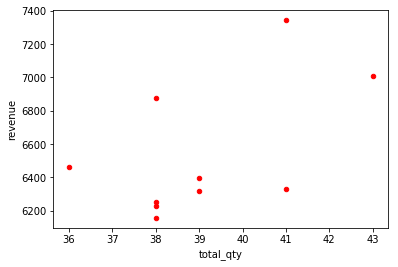

In [35]:
subset_data3.plot(kind='scatter',x='total_qty',y='revenue',color='red')
plt.show()